<a href="https://colab.research.google.com/github/2303a51413/applications-of-data-minning/blob/main/Multiple%20Linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
# Reading the Dataset
df = pd.read_csv("/content/multiple_linear_regression_dataset.csv")

In [5]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [6]:
print(df.corr())

                 age  experience    income
age         1.000000    0.615165  0.532204
experience  0.615165    1.000000  0.984227
income      0.532204    0.984227  1.000000


In [7]:
print(df.describe())

             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


In [8]:
print(df.describe())

             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


Index(['age', 'experience', 'income'], dtype='object')


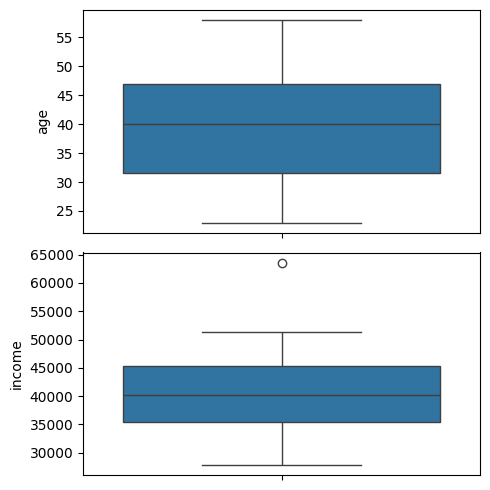

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for the correct column name
print(df.columns) # Print the columns of your DataFrame to verify the correct name

# Assuming the correct column name is 'age', update the code:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['age'], ax = axs[0]) # Changed 'weight' to 'age'
plt2 = sns.boxplot(df['income'], ax = axs[1])  # Changed 'Volume' to 'income'
plt.tight_layout()



Index(['age', 'experience', 'income'], dtype='object')


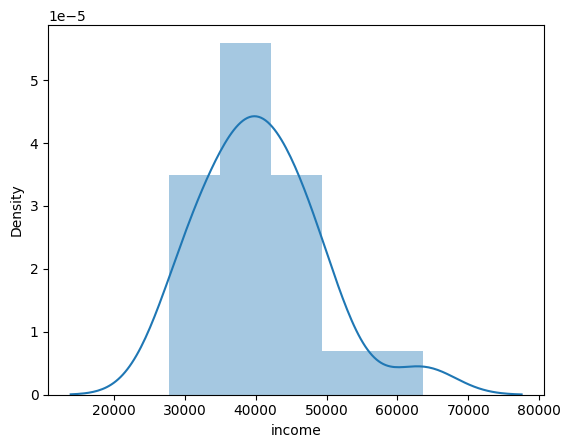

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for the correct column name
print(df.columns) # Print the columns of your DataFrame to verify the correct name

# Assuming the correct column name is 'income', update the code:
sns.distplot(df['income']); # Changed 'CO2' to 'income'

Index(['age', 'experience', 'income'], dtype='object')


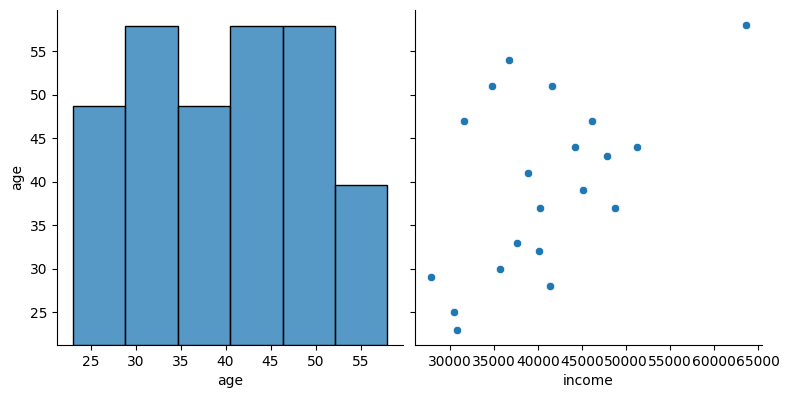

In [18]:
# Correct the column names in the pairplot function
# Make sure they match the actual column names in your DataFrame 'df'

# Print df.columns to see the available columns
print(df.columns)

# Example: If your columns are named 'weight', 'volume', and 'co2',
# then use the following:
sns.pairplot(df, x_vars=['age', 'income'], y_vars=['age'], height=4, aspect=1, kind='scatter')
plt.show()

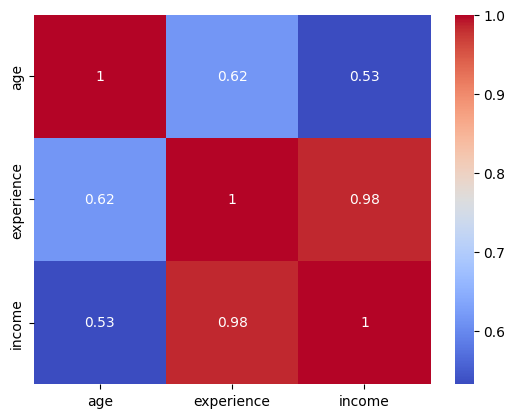

In [20]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()


In [27]:
# Assuming 'income' is the target variable you want to predict, based on your DataFrame:
X = df[['age', 'experience']]  # Features
y = df['income']  # Target variable

# Now you can split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [28]:
y_train.shape

(14,)

In [29]:
y_test.shape

(6,)

In [30]:
reg_model = linear_model.LinearRegression()

In [31]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [32]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  30510.643844104634


[('age', -79.68088640690299), ('experience', 2167.573549181646)]

In [33]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  30510.643844104634


[('age', -79.68088640690299), ('experience', 2167.573549181646)]

In [35]:
# ... (your existing code) ...

#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

# ... (other code) ...

# Make predictions on the test set
y_pred = reg_model.predict(X_test) # This line is crucial: predict and assign to y_pred

print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [30845.55700593 49238.18653887 46273.80412562 46512.84678484
 35117.21283408 39117.44677062]


In [36]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
17,30870,30845.557006
19,48700,49238.186539
11,46110,46273.804126
18,44190,46512.846785
13,34800,35117.212834
6,41340,39117.446771


In [37]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 931.5077511414116
Mean Square Error: 1792176.3379165696
Root Mean Square Error: 1338.7219046226776
